In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, cheb2poly
import sys
sys.path.insert(0, '../seal_wrapper/')
from seal_wrapper import EA

In [21]:
x = np.linspace(-9.9, 10.0, 200)
x

array([-9.90000000e+00, -9.80000000e+00, -9.70000000e+00, -9.60000000e+00,
       -9.50000000e+00, -9.40000000e+00, -9.30000000e+00, -9.20000000e+00,
       -9.10000000e+00, -9.00000000e+00, -8.90000000e+00, -8.80000000e+00,
       -8.70000000e+00, -8.60000000e+00, -8.50000000e+00, -8.40000000e+00,
       -8.30000000e+00, -8.20000000e+00, -8.10000000e+00, -8.00000000e+00,
       -7.90000000e+00, -7.80000000e+00, -7.70000000e+00, -7.60000000e+00,
       -7.50000000e+00, -7.40000000e+00, -7.30000000e+00, -7.20000000e+00,
       -7.10000000e+00, -7.00000000e+00, -6.90000000e+00, -6.80000000e+00,
       -6.70000000e+00, -6.60000000e+00, -6.50000000e+00, -6.40000000e+00,
       -6.30000000e+00, -6.20000000e+00, -6.10000000e+00, -6.00000000e+00,
       -5.90000000e+00, -5.80000000e+00, -5.70000000e+00, -5.60000000e+00,
       -5.50000000e+00, -5.40000000e+00, -5.30000000e+00, -5.20000000e+00,
       -5.10000000e+00, -5.00000000e+00, -4.90000000e+00, -4.80000000e+00,
       -4.70000000e+00, -

In [22]:
def relu(z):
    return np.maximum(0, z)

In [24]:
y = relu(x)

In [25]:
coeffs_cheb = chebfit(x, y, deg=3)

In [26]:
coeffs = cheb2poly(coeffs_cheb)
coeffs

array([ 9.37265599e-01,  5.02343945e-01,  4.68843771e-02, -5.47011750e-05])

In [27]:
data = x[:, None] ** np.arange(coeffs.shape[0])

In [28]:
relu_approx = data.dot(coeffs[:, None])

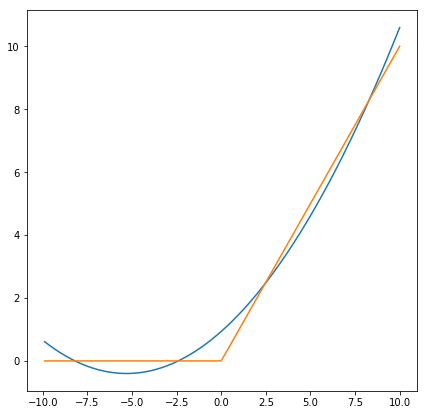

In [29]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)

In [30]:
x_enc = EA(x[:, None], True)

In [31]:
x_relu = x_enc.relu()

In [32]:
relu_vals = x_relu.values()

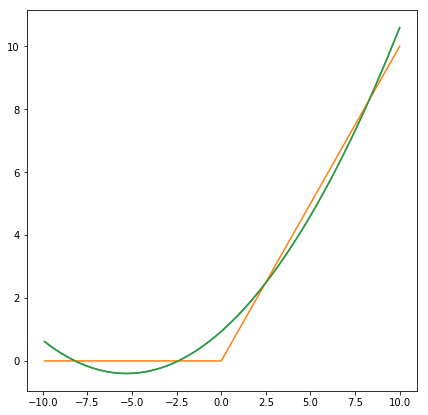

In [33]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)
plt.plot(x, relu_vals)